# 09.08
- 데이터 전처리
- 빅데이터 분석 과정
- 모델 성능 지표
- 독립변수 상관관계
- 지도학습
    - 의사결정나무
    - KNN
    - SVN
    - 로지스틱회귀
    - 랜덤포레스트

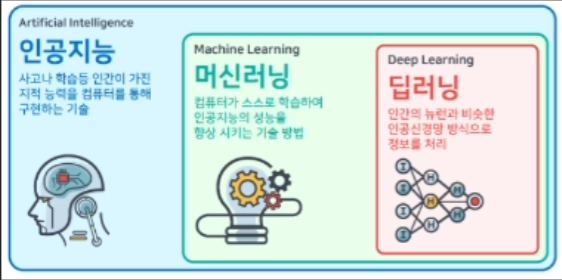

## 데이터 전처리 유형
1. 결측치 처리
2. 틀린 값(invalid)값 처리
3. 이상치 처리
4. 데이터 변환
5. 데이터 축소
6. 샘플링

### 결측치 처리 방법
1) 결측치가 포함되어 있는 항목을 모두 버림
2) 결측치를 적절한 값으로 대체
3) 결측치를 NaN으로 표시하여 다음의 분석 단계로 결측치 처리를 넘김

### 틀린 값 처리 방법
1) 틀린 값이 포함되어 있는 항목을 모두 버림
2) 틀린 값을 적절한 값으로 대체
3) 

## 이상치 처리
- 이상치란 값의 범위가 일반적인 범위를 벗어나 특별한 값을 갖는 것을 말함
- 이상치를 찾아내는 것을 이상치 검출이라고 함

### 데이터 변환
    데이터를 분석하기 좋은 형태로 바꾸는 작업
    데이터의 분포를 고려하여 정규화하거나 단위를 조정하거나 로그 스케일로 변환하는 것을 모두 데이터 변환이다
1. 범주형으로 변환
- 수치 데이터를 번주형으로 변환하여 사용하는 경우
1. 일반 정규화
- 분석을 정확하게 하기 위해서는 원래

### 데이터 축소
- 같은 정보량을 가지면서 데이터의 크기를 줄이는 것
- 데이터 축소의 방법으로 기존 데이터의 특징들을 대표하는 새로운 값을 추출하는 것을 PCA(Principal Component Analysis)라고 함


### 샘플링
- 구할 수 있는 정체 데이터 중에서 분석에 필요한 데이터를 취하는 것
- 최소한의 샘플 데이터를 가지고 분석의 타당성을 조사하거나 분석 모델의 큰 방향을 정할 때 샘플링이 필요
- 샘플링에서 중요한

### 데이터 변환
- 범주화

2. 표준 정규화
- 데이터 스케일링
    - 데이터의 범위가 같아지도록 변수별로 값을 비례적으로 조정하는 과정

1. z-표준화
- z-표준화는 변숫값에서 평균을 뺀 후 표준편차로 나누는 것으로, 변환 후 데이터의 평균은 0, 표준편차는 1
2. Min-Max 정규화
- 연속형 변수의 값을 0과 1 사이의 값으로 변환
- 스케일이 다른 두 변수를 상호 간에 비교가 가능

한국인 1,000명의 연간 육류 소비량이 53.9kg, 표준편차 5kg의 정규분포를 따르고,

일본인 성인 남성 1,000명의 육류 소비량이 32.7kg, 표준편차 4kg의 정규분포를 따른다고 했을 때

두 집단의 육류 소비량을 평균이 0, 표준편차가 1인 표준정규분포로 표준화를 해본다.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = np.random.randn(1000)
# 국가별 1000명의 육류 소비량 데이터
# 표준편차 * (크기가 n인 표준정규분포를 따르는 랜덤 데이터) + 평균
meat_korea = 5 * np.random.randn(1000) + 53.9
meat_japan = 4 * np.random.randn(1000) + 32.7

# 데이터 프레임 생성
meat = pd.DataFrame(
    {'Korean': meat_korea,
     'Japanese': meat_japan}
)

print(meat)

        Korean   Japanese
0    48.202967  29.596183
1    50.115208  23.858847
2    50.504560  27.146719
3    51.618712  27.640682
4    57.802971  27.415104
..         ...        ...
995  51.784227  37.013801
996  58.397251  37.363413
997  53.887473  30.239346
998  60.184443  31.957272
999  55.004319  34.624240

[1000 rows x 2 columns]


In [28]:
meat.describe()

,Korean,Japanese
count,1000.000000,1000.000000
mean,53.979474,32.554375
std,5.021579,3.897513
min,35.021037,20.304074
25%,50.620417,29.965515
50%,53.827648,32.737891
75%,57.247380,35.282673
max,73.294422,44.393921


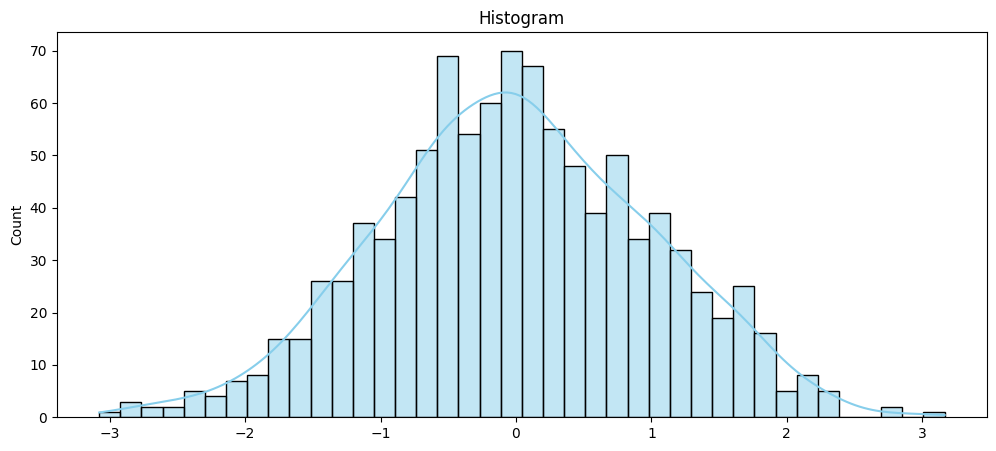

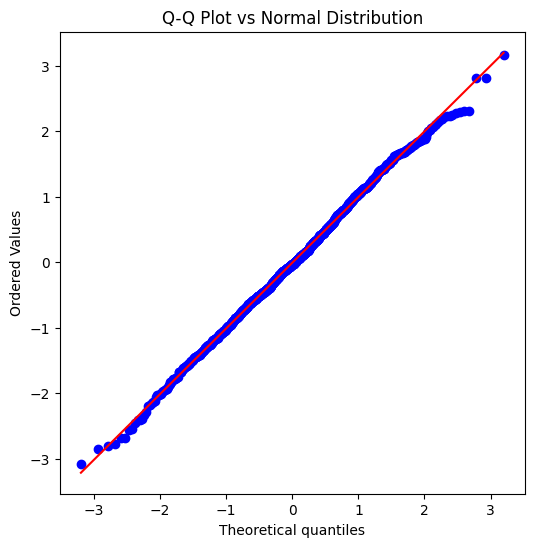

In [68]:
import scipy.stats as stats
import seaborn as sns

# 히스토그램
plt.figure(figsize=(12,5))
# kde=True : 데이터 분포의 추정된 확률 밀도 함수(커널 밀도 추정)
sns.histplot(data, bins=40, kde=True, color="skyblue")
plt.title("Histogram")
plt.show()

# Q-Q Plot
plt.figure(figsize=(6,6))
stats.probplot(data, dist="norm", plot=plt)  # 정규분포와 비교
plt.title("Q-Q Plot vs Normal Distribution")
plt.show()

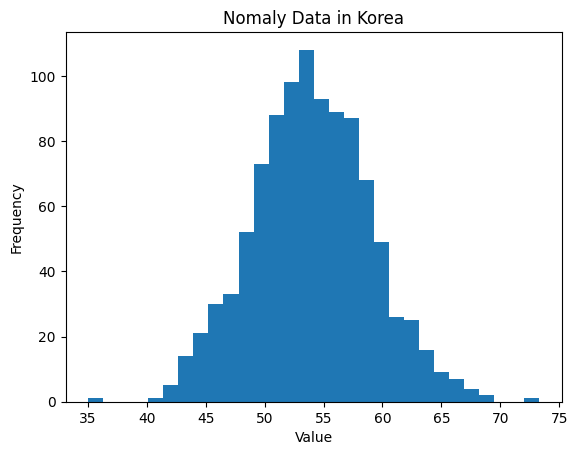

In [29]:
plt.hist(meat_korea, bins = 30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Nomaly Data in Korea')
plt.show()

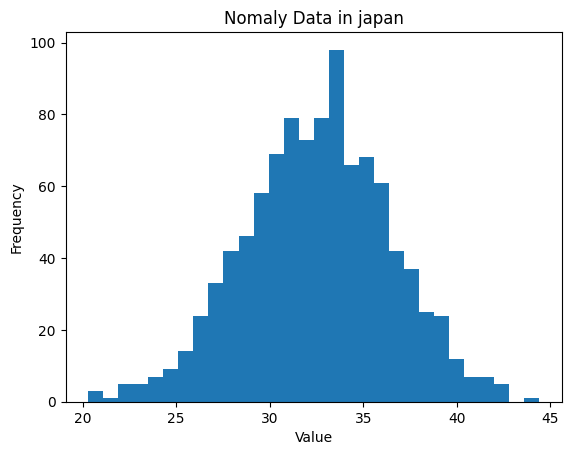

In [30]:
plt.hist(meat_japan, bins = 30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Nomaly Data in japan')
plt.show()

In [31]:
meat.sample(10)

,Korean,Japanese
324,53.601870,41.328118
878,52.238726,34.802859
879,64.685831,35.774971
4,57.802971,27.415104
537,59.384658,26.298811
240,52.798404,29.392305
847,59.470964,32.093053
627,53.733432,36.158720
455,51.628982,33.889502
880,50.618545,39.662199


In [32]:
# z-score (z-표준화)
# (원점수 - 평균) / 표준편차
meat['Korea_z_score'] = (meat['Korean'] - meat['Korean'].mean()) / meat['Korean'].std()
meat['Japan_z_score'] = (meat['Japanese'] - meat['Japanese'].mean()) / meat['Japanese'].std()
meat.sample(10)

,Korean,Japanese,Korea_z_score,Japan_z_score
926,54.696698,29.224096,0.142828,-0.854463
113,52.545587,31.472310,-0.285545,-0.277630
57,53.302474,32.527308,-0.134818,-0.006945
263,60.428028,34.117411,1.284169,0.401034
415,48.694154,32.302544,-1.052521,-0.064613
480,47.141283,35.193186,-1.361761,0.677050
330,50.345987,29.198190,-0.723575,-0.861109
355,46.042097,26.449412,-1.580654,-1.566374
835,53.610749,34.773579,-0.073428,0.569390
585,57.316298,29.667475,0.664497,-0.740703


In [ ]:
# !pip install scikit-learn

You should consider upgrading via the 'C:\Temp\2025\venv310\Scripts\python.exe -m pip install --upgrade pip' command.


In [38]:
# 사이킷런 스케일럴를 이용한 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meat['Korea_scaler'] = scaler.fit_transform(meat[['Korean']])
meat['Japan_scaler'] = scaler.fit_transform(meat[['Japanese']])
meat.sample(10)

,Korean,Japanese,Korea_z_score,Japan_z_score,Korea_scale2,Japan_scale2,Korea_scaler,Japan_scaler
29,53.093330,29.386420,-0.176467,-0.812814,-0.176555,-0.813221,-0.176555,-0.813221
625,50.400403,35.308989,-0.712738,0.706762,-0.713095,0.707116,-0.713095,0.707116
709,56.264962,36.491453,0.455133,1.010151,0.455361,1.010657,0.455361,1.010657
900,52.322814,41.269136,-0.329908,2.235980,-0.330073,2.237099,-0.330073,2.237099
675,49.525313,30.293281,-0.887004,-0.580138,-0.887448,-0.580428,-0.887448,-0.580428
67,45.424601,36.294136,-1.703622,0.959525,-1.704475,0.960005,-1.704475,0.960005
710,64.322497,34.042496,2.059715,0.381813,2.060746,0.382004,2.060746,0.382004
36,56.033891,31.819896,0.409118,-0.188448,0.409322,-0.188542,0.409322,-0.188542
27,49.680680,27.692906,-0.856064,-1.247326,-0.856493,-1.247950,-0.856493,-1.247950
157,54.939000,34.589396,0.191081,0.522133,0.191176,0.522394,0.191176,0.522394


In [40]:
# Min-Max 정규화
# 공식 : (원점수 - 최소값) / (최대값 - 최소값)
Min_k = np.min(meat['Korean'])
Max_k = np.max(meat['Korean'])
meat['Korea_mm'] = (meat['Korean'] - Min_k) / (Max_k - Min_k)
Min_j = np.min(meat['Japanese'])
Max_j = np.max(meat['Japanese'])
meat['Japan_mm'] = (meat['Japanese'] - Min_j) / (Max_j - Min_j)
meat.sample(10)

,Korean,Japanese,Korea_z_score,Japan_z_score,Korea_scale2,Japan_scale2,Korea_scaler,Japan_scaler,Korea_mm,Japan_mm
968,52.478694,26.790164,-0.298866,-1.478946,-0.299016,-1.479686,-0.299016,-1.479686,0.456130,0.269246
808,56.616700,29.208355,0.525179,-0.858501,0.525442,-0.858931,0.525442,-0.858931,0.564248,0.369628
196,56.793649,35.405656,0.560417,0.731564,0.560697,0.731930,0.560697,0.731930,0.568871,0.626886
576,57.065227,31.657891,0.614499,-0.230014,0.614806,-0.230129,0.614806,-0.230129,0.575967,0.471311
7,52.893837,34.306667,-0.216194,0.449592,-0.216302,0.449817,-0.216302,0.449817,0.466977,0.581265
209,53.323032,30.808406,-0.130724,-0.447970,-0.130790,-0.448194,-0.130790,-0.448194,0.478191,0.436048
215,50.844531,34.514937,-0.624294,0.503029,-0.624607,0.503281,-0.624607,0.503281,0.413433,0.589911
453,54.242637,35.045657,0.052407,0.639198,0.052433,0.639518,0.052433,0.639518,0.502218,0.611942
456,55.956657,27.766680,0.393737,-1.228397,0.393934,-1.229012,0.393934,-1.229012,0.547002,0.309782
3,51.618712,27.640682,-0.470123,-1.260725,-0.470359,-1.261356,-0.470359,-1.261356,0.433661,0.304552


In [41]:
# 사이킷런에서 MinMaxScaler 함수 이용
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
meat['Korea_mm_scaler'] = scaler.fit_transform(meat[['Korean']])
meat['Japan_mm_scaler'] = scaler.fit_transform(meat[['Japanese']])
meat.sample(10)

,Korean,Japanese,Korea_z_score,Japan_z_score,Korea_scale2,Japan_scale2,Korea_scaler,Japan_scaler,Korea_mm,Japan_mm,Korea_mm_scaler,Japan_mm_scaler
758,49.912809,28.539542,-0.809838,-1.030101,-0.810243,-1.030617,-0.810243,-1.030617,0.389090,0.341865,0.389090,0.341865
259,50.827510,34.424363,-0.627684,0.479790,-0.627998,0.480030,-0.627998,0.480030,0.412989,0.586151,0.412989,0.586151
221,58.892962,25.878700,0.978475,-1.712804,0.978964,-1.713661,0.978964,-1.713661,0.623721,0.231410,0.623721,0.231410
771,57.995685,34.317408,0.799791,0.452348,0.800191,0.452575,0.800191,0.452575,0.600277,0.581711,0.600277,0.581711
237,54.712529,29.547394,0.145981,-0.771513,0.146054,-0.771899,0.146054,-0.771899,0.514496,0.383702,0.514496,0.383702
205,58.311166,32.949876,0.862616,0.101475,0.863047,0.101526,0.863047,0.101526,0.608520,0.524943,0.608520,0.524943
232,55.480372,37.657283,0.298890,1.309273,0.299039,1.309928,0.299039,1.309928,0.534558,0.720354,0.534558,0.720354
983,46.627142,32.100011,-1.464147,-0.116578,-1.464880,-0.116636,-1.464880,-0.116636,0.303242,0.489664,0.303242,0.489664
161,61.431020,34.405893,1.483905,0.475051,1.484648,0.475289,1.484648,0.475289,0.690035,0.585384,0.690035,0.585384
556,56.155264,29.930762,0.433288,-0.673150,0.433505,-0.673487,0.433505,-0.673487,0.552191,0.399616,0.552191,0.399616


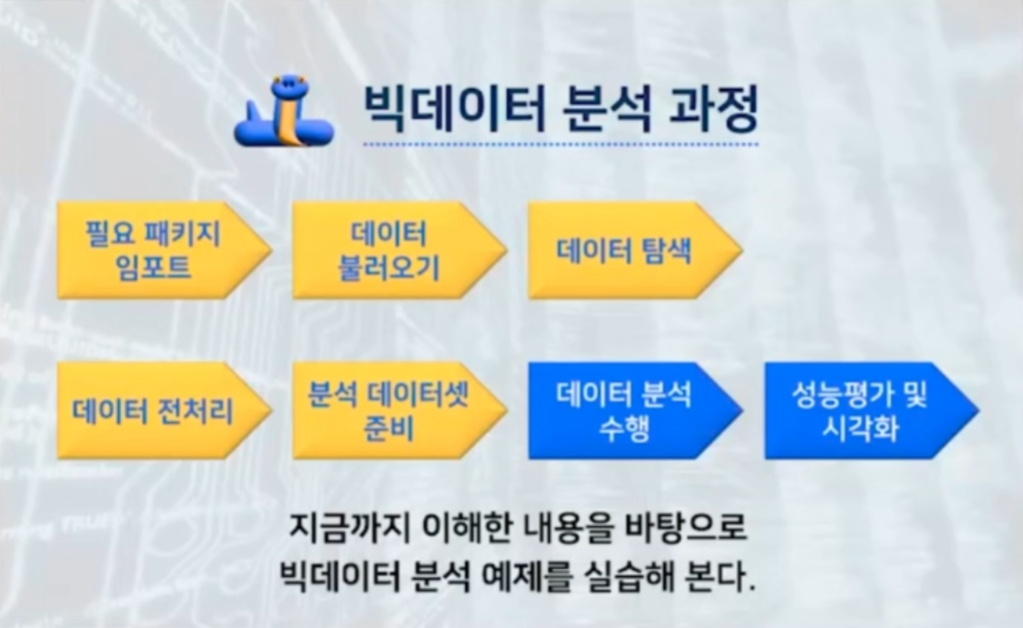